In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from chronos import BaseChronosPipeline, Chronos2Pipeline
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller

In [6]:
pipeline: Chronos2Pipeline = BaseChronosPipeline.from_pretrained("amazon/chronos-2")

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


In [47]:
context_df = pd.read_csv("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_hourly/train.csv",)

In [48]:
print(context_df.info())
print(context_df.describe())
context_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353500 entries, 0 to 353499
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   item_id    353500 non-null  object 
 1   timestamp  353500 non-null  object 
 2   target     353500 non-null  float64
dtypes: float64(1), object(2)
memory usage: 8.1+ MB
None
              target
count  353500.000000
mean     5606.169408
std     35495.304697
min        10.000000
25%        18.100000
50%        29.000000
75%       497.000000
max    703008.000000


,item_id,timestamp,target
0,H1,1750-01-01 00:00:00,605.0
1,H1,1750-01-01 01:00:00,586.0
2,H1,1750-01-01 02:00:00,586.0
3,H1,1750-01-01 03:00:00,559.0
4,H1,1750-01-01 04:00:00,511.0


In [118]:
a = pipeline.predict_df(context_df)

c:\Users\yahya\Desktop\MR Project\Code\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [120]:
a.head()

,item_id,timestamp,target_name,predictions,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,H1,1750-01-30 04:00:00,target,622.113831,607.381409,612.744080,616.131165,619.489563,622.113831,624.886047,628.267761,632.398621,637.851135
1,H1,1750-01-30 05:00:00,target,560.344055,542.708191,549.568848,553.924011,557.329346,560.344055,563.177917,566.139160,570.404602,576.862976
2,H1,1750-01-30 06:00:00,target,517.492920,501.659241,506.874268,510.557983,514.050659,517.492920,520.435913,523.633545,528.416565,535.518433
3,H1,1750-01-30 07:00:00,target,485.103699,468.927612,474.129028,477.784271,481.699951,485.103699,489.098083,492.807800,498.370178,505.687378
4,H1,1750-01-30 08:00:00,target,464.908325,444.995850,451.817352,457.268768,461.409851,464.908325,468.963074,473.357208,479.093201,486.085266


ADF Statistic: (np.float64(-7.696120432542847), np.float64(1.377869850117828e-11), 5, 494, {'1%': np.float64(-3.4436568932270095), '5%': np.float64(-2.8674084917497074), '10%': np.float64(-2.5698956806372832)}, np.float64(1748.9993725063603))


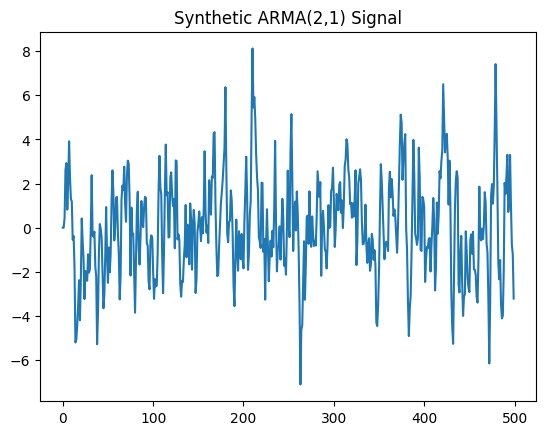

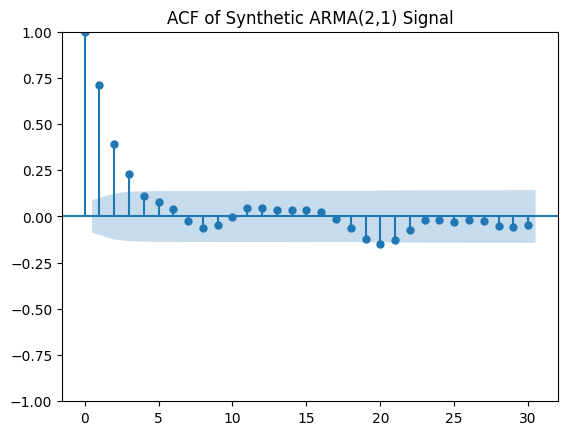

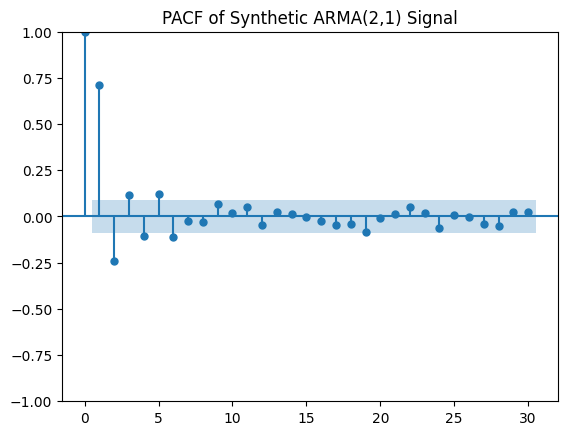

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf   
from statsmodels.tsa.stattools import adfuller

np.random.seed(42)

T = 500  # length of the signal
eps = np.random.normal(0, 1, T)  # white noise

# parameters for ARMA(2,1)
phi = [.3, 0.2]   # AR(2)
theta = [1.5]      # MA(1)

X = np.zeros(T)

for t in range(2, T):
    ar = phi[0] * X[t-1] + phi[1] * X[t-2]
    ma = theta[0] * eps[t-1]
    X[t] = ar + ma + eps[t]

print("ADF Statistic:", adfuller(X))

plt.plot(X)
plt.title("Synthetic ARMA(2,1) Signal")

plot_acf(X, lags=30)
plt.title("ACF of Synthetic ARMA(2,1) Signal")

plot_pacf(X, lags=30)
plt.title("PACF of Synthetic ARMA(2,1) Signal")
plt.show()


In [142]:
AR = 2
MA = 1

ARMA_model = ARIMA(X, order=(AR, 0, MA))
ARMA_result = ARMA_model.fit()
print(ARMA_result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -901.657
Date:                Fri, 05 Dec 2025   AIC                           1813.313
Time:                        20:52:42   BIC                           1834.386
Sample:                             0   HQIC                          1821.582
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0323      0.215      0.150      0.881      -0.389       0.454
ar.L1          0.2005      0.086      2.341      0.019       0.033       0.368
ar.L2          0.2590      0.074      3.479      0.0